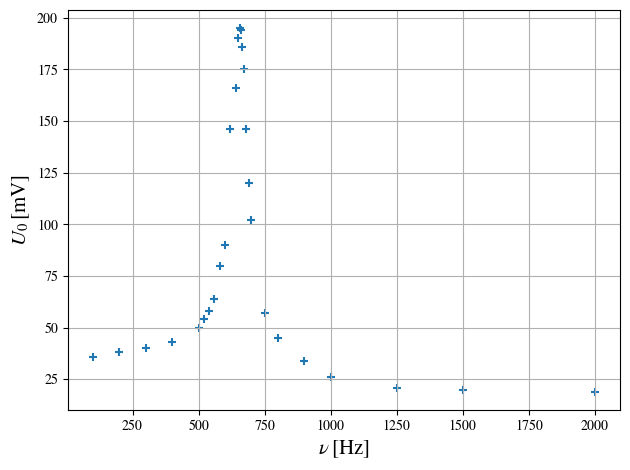

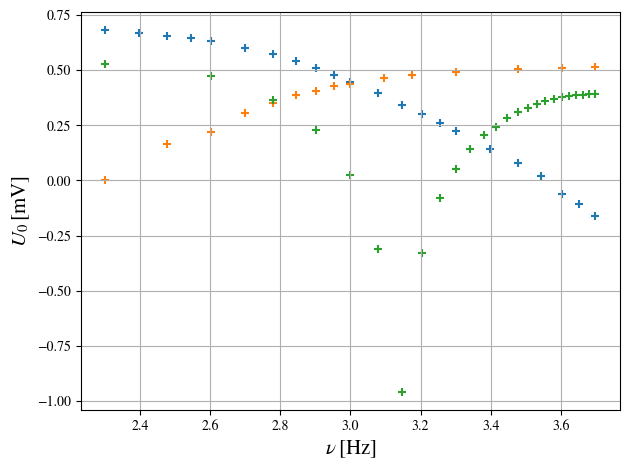

In [62]:
import sympy as sp
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'



def calcErr(f: sp.Expr, values: List[float], errorL: List[float]) -> Tuple[sp.Function, float]:
    """
    Calculate error using Gaussian error propagation.
    
    Parameters:
    -----------
    f : sympy.Expr
        Symbolic function for which error needs to be calculated
    values : List[float]
        List of values for each variable in the function
    errorL : List[float]
        List of uncertainties for each variable in the function
        
    Returns:
    --------
    Tuple[sp.Function, float]
        - Symbolic error propagation function
        - Numerical result of error calculation
    """
    # Get variables in the function
    vars = list(f.free_symbols)
    
    if not (len(vars) == len(errorL) == len(values)):
        raise ValueError("Number of values and errors must match number of variables in function")
    
    # Create symbolic error variables
    error_symbols = [sp.Symbol(f'Δ{var}') for var in vars]
    
    # Create symbolic error propagation function
    error_expr = sp.sqrt(sum((sp.diff(f, var) * err)**2 
                           for var, err in zip(vars, error_symbols)))
    # Convert to sp.Function
    error_func = sp.Function('σ')(*error_symbols)
    
    error_func = error_func.subs(error_func, error_expr)
    
    # Print the symbolic error propagation function
    # print("\nSymbolic error propagation function:")
    # print(f"{error_func.simplify()}")
    
    # Calculate numerical result using the provided values
    numerical_error = error_expr.subs(dict(zip(error_symbols, errorL)))
    result = float(numerical_error.evalf(subs=dict(zip(vars, values))))
    
    return result

def find_error_func(f: sp.Expr) -> sp.Function:
    """
    Creates symbolic error propagation function for given function f.
    
    Parameters:
    -----------
    f : sympy.Expr
        Symbolic function for which error propagation function is needed
        
    Returns:
    --------
    sp.Function
        Symbolic error propagation function
    """
    # Get variables in the function
    vars = list(f.free_symbols)
    
    # Create symbolic error variables
    error_symbols = [sp.Symbol(f'Δ{var}') for var in vars]
    
    # Create symbolic error propagation function
    error_expr = sp.sqrt(sum((sp.diff(f, var) * err)**2 
                           for var, err in zip(vars, error_symbols)))
    
    # Convert to sp.Function
    error_func = sp.Function('σ')(*error_symbols)
    error_func = error_func.subs(error_func, error_expr)
    
    return error_func

def b():
    
    L1, R2, RB, R1, RA = sp.symbols('L_1 R_2 R_B R_1 R_A')
    values = [20, 40, 1000, 32, 20]
    errors = [0.001, 0.002, 0.03, 0.0234, 0.01235]
    
    L2 = L1 * (R2 - RB) / (R1 + RA)
    return calcErr(L2, values, errors)
    
def plot(source, target, xlabel, ylabel):

    data = np.genfromtxt(source, delimiter=' ')
    plt.grid()
    plt.scatter(data[:,0], data[:, 1], marker="+")
    
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.tight_layout()

def plotlog(source, target, xlabel, ylabel, logs):

    data = np.genfromtxt(source, delimiter=' ')
    plt.grid()
    if(logs == 2):
        plt.scatter(np.log10(data[:,0]), np.log10(data[:, 1]), marker="+")
        
    if(logs == 1):
        plt.scatter((data[:,0]), np.log10(data[:, 1]), marker="+")
        
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.tight_layout()

def j():
    plot("Data/234j.csv", "test.png", r'$ \nu \: \left[ \text{Hz} \right] $', r'$U_0 \: \left[ \text{mV} \right]$')
    plt.show()

def f():
    plotlog("Data/234f_tief.csv", "test.png", r'$ \nu \: \left[ \text{Hz} \right] $', r'$U_0 \: \left[ \text{mV} \right]$', 2)
    plotlog("Data/234f_hoch.csv", "test.png", r'$ \nu \: \left[ \text{Hz} \right] $', r'$U_0 \: \left[ \text{mV} \right]$', 2)
    plotlog("Data/234f_sperr.csv", "test.png", r'$ \nu \: \left[ \text{Hz} \right] $', r'$U_0 \: \left[ \text{mV} \right]$', 2)
    plt.show()

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

j()
f()
